# Bit By Bit ORE

Bayes Vulnerability

In [2]:
import collections
import math
from math import floor, log2
import numpy as np
import pandas as pd
from itertools import combinations # for ki_combo
from scipy.special import perm # for nPk
from sympy.utilities.iterables import partitions
from sympy.functions.combinatorial.numbers import stirling
from decimal import Decimal
import matplotlib.pyplot as plt 
pd.set_option('precision', 10)
%matplotlib inline

#### MY ALGORITHM 

_npPos(n1, n2)_: subroutine

MSB: My leftmost bit position between n1 and n2

In [3]:
def npPos(n1, n2):
    if (n1 <= 16 or n2 <= 16):
        w = 4
    else:
        raise ValueError("n1 or n2 too large rn. <=16")
    xorval = np.bitwise_xor(n1, n2)
    pos = w - floor(log2(xorval))
    return pos

In [4]:
n1, n2 = 0, 1
print(npPos(n1, n2))

4


Given i numbers picked from set of k, output number of unique bit patterns.

Example: k = |4| {0, 1, 2, 3} and i = 3. There are 2 different bit patterns

Algorithm:

For set of k:
    * For all ordered subsets of size i: (kCi)
        find all unique patterns (list of lists)
            iterate through vector
        count number of unique patterns
    * M_{k, i} := count

In [5]:
def unique_ki(k,i):
    ki_combo = combinations(range(k),i)
    big_pos_list = []
    for s in ki_combo: #for each set in ki_combo
        # print("s: ", s)
        pos_list = []
        for n1, n2 in zip(s, s[1:]):
            # print("n1: ", n1, " and n2: ", n2)
            n1n2_pos = npPos(n1, n2)
            # print("n1n2 position: ", n1n2_pos)
            pos_list.append(n1n2_pos)
        if pos_list not in big_pos_list:
            big_pos_list.append(pos_list)
    #print(big_pos_list)
    return len(big_pos_list)

In [6]:
k = 4 # {0-3}
i = 3
u = unique_ki(k,i)
print(u)

2


In [12]:
i_limit = 16
i_col = []
for i in range(i_limit):
    i_str = ""
    i_str += "i" + str(i+1)
    i_col.append(i_str)
print(i_col)

['i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'i10', 'i11', 'i12', 'i13', 'i14', 'i15', 'i16']


In [21]:
def populate_kidf(k_limit, i_limit):
    #p = {'k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]}
    zero_data = np.zeros(shape=(k_limit,i_limit))

    i_col = []
    for i in range(i_limit):
        i_str = ""
        i_str += "i" + str(i+1) # 1 - i_limit
        i_col.append(i_str)
        
    k_row = []
    for k in range(k_limit):
        k_str = ""
        k_str += "k" + str(k+1) # 1 - k_limit
        k_row.append(k_str)
        
    df = pd.DataFrame(zero_data, index=k_row, columns = i_col)
    df.rename_axis('k')
    return df

In [28]:
k_limit = 16
k_limit = 16
df_16x16 = populate_kidf(k_limit, i_limit)
for k in range(k_limit):
    k_str = ""
    k_str += "k" + str(k+1)
    for i in range(i_limit):
        i_str = ""
        i_str += "i" + str(i+1)
        if i > k:
            df_16x16.at[k_str, i_str] = 0.0
        else:
            u = unique_ki(k+1,i+1)
            print("u : ", u, " k: ", k+1, " i: ", i+1)
            df_16x16.at[k_str, i_str] = u
df_16x16

u :  1  k:  1  i:  1
u :  1  k:  2  i:  1
u :  1  k:  2  i:  2
u :  1  k:  3  i:  1
u :  2  k:  3  i:  2
u :  1  k:  3  i:  3
u :  1  k:  4  i:  1
u :  2  k:  4  i:  2
u :  2  k:  4  i:  3
u :  1  k:  4  i:  4
u :  1  k:  5  i:  1
u :  3  k:  5  i:  2
u :  4  k:  5  i:  3
u :  3  k:  5  i:  4
u :  1  k:  5  i:  5
u :  1  k:  6  i:  1
u :  3  k:  6  i:  2
u :  5  k:  6  i:  3
u :  5  k:  6  i:  4
u :  3  k:  6  i:  5
u :  1  k:  6  i:  6
u :  1  k:  7  i:  1
u :  3  k:  7  i:  2
u :  6  k:  7  i:  3
u :  8  k:  7  i:  4
u :  7  k:  7  i:  5
u :  4  k:  7  i:  6
u :  1  k:  7  i:  7
u :  1  k:  8  i:  1
u :  3  k:  8  i:  2
u :  6  k:  8  i:  3
u :  9  k:  8  i:  4
u :  10  k:  8  i:  5
u :  8  k:  8  i:  6
u :  4  k:  8  i:  7
u :  1  k:  8  i:  8
u :  1  k:  9  i:  1
u :  4  k:  9  i:  2
u :  9  k:  9  i:  3
u :  15  k:  9  i:  4
u :  19  k:  9  i:  5
u :  18  k:  9  i:  6
u :  12  k:  9  i:  7
u :  5  k:  9  i:  8
u :  1  k:  9  i:  9
u :  1  k:  10  i:  1
u :  4  k:  10  i:  2
u :  1

,i1,i2,i3,i4,i5,i6,i7,i8,i9,i10,i11,i12,i13,i14,i15,i16
k1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k3,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k4,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k5,1.0,3.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k6,1.0,3.0,5.0,5.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k7,1.0,3.0,6.0,8.0,7.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k8,1.0,3.0,6.0,9.0,10.0,8.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k9,1.0,4.0,9.0,15.0,19.0,18.0,12.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
k10,1.0,4.0,10.0,18.0,25.0,27.0,22.0,13.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


__uni_ore_bbb_bayes(n, k)__ calculates calculates the posterior Bayes vulnerability for bit-by-bit Order Revealing Encryption (ORE). Only works on a uniform prior for now. 

(Equation for Ideal only. Working out numerator)
$$ V_1 [C \triangleright \pi ]  =  \frac{\sum_{i=1}^{min(n, k)} \text{stirling2}(n, i)\times i!}{\sum_{i=1}^{min(n, k)} \text{stirling2}(n, i)\times kPi}  $$

The numerator is larger than ideal ORE (more channel outputs)

The denominator is the same as ideal ORE (same number of channel inputs)

In [51]:
def uni_ore_bayes(n, k): # annotated equation from ideal ORE
    outputs = 0
    inputs = 0
    for c in range(n):
        if k < c+1:
            break
        s2 = stirling(n, c+1)
        outputs = outputs + (math.factorial(c+1) * s2)
        inputs = inputs + (perm(k, c+1) * s2)
    return outputs / inputs

In [52]:
print("Bayes for ideal: ", uni_ore_bayes(3, 3))

Bayes for ideal:  0.481481481481481


In [53]:
def uni_ore_bbb_bayes(n, k):
    outputs = 0
    inputs = 0
    for c in range(n):
        if k < c+1:
            break
        s2 = stirling(n, c+1)
        outputs = outputs + (math.factorial(c+1) * s2) # the matrix place should be multiplied in parenthesis
        inputs = inputs + (perm(k, c+1) * s2)
    print("outputs: ", outputs)
    print("inputs: ", inputs)
    return outputs / inputs

In [54]:
print("bayes ", uni_ore_bbb_bayes(4, 3))

outputs:  13
inputs:  27.0000000000000
bayes  0.481481481481481


In [7]:
count = 0
for p in partitions(4, m = 16):
    print(p)
    count = count + 1
print(count)

{4: 1}
{3: 1, 1: 1}
{2: 2}
{2: 1, 1: 2}
{1: 4}
5


In [90]:
n = 4
k = 2
i = 0
p = 0
for c in range(min(n, k)):
    i = i + 1
    s2 = stirling(n, i) * math.factorial(i)
    print("S2 at i = ", i, " is ", s2)
    p = p + s2
print(p)

S2 at i =  1  is  1
S2 at i =  2  is  14
15


In [110]:
n = 4
k = 2
i = 0
p = 0
for c in range(k):
    i = i + 1
    s2 = comb(k-1, i-1)
    print("S2 at i = ", i, " is ", s2)
    p = p + s2
print(p)

S2 at i =  1  is  1.0
S2 at i =  2  is  1.0
2.0


In [42]:
from scipy.special import comb

## For Presentation
Comparing Ideal ORE and BbB ORE

In [31]:
p = {'k': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    'BbBn4': [0.8024691358024691, 0.48828125, 0.4144, 0.2646604938271605, 0.18783840066638902, 0.115966796875, 0.11294010059442158, 0.0849, 0.06700361997131343, 0.04846643518518518, 0.04064983719057456, 0.03084652228238234, 0.023881481481481483, 0.0184478759765625], #k = 15 is confusing
    'BbBn5': [0.8683127572016461, 0.5869140625, 0.48992, 0.30877057613168724, 0.22318081751651098, 0.132781982421875, 0.12448983047977104, 0.08941, 0.06911475246971456, 0.04762651105967078, 0.040078859552967604, 0.029230752067590886, 0.021966748971193415, 0.016023635864257812],
    'Idealn4': [0.629629629629630, 0.292968750000000, 0.120000000000000, 0.0578703703703704, 0.0312369845897543, 0.0183105468750000, 0.0114311842706904, 0.00750000000000000, 0.00512260091523803, 0.00361689814814815, 0.00262595847484332, 0.00195231153685964, 0.00148148148148148, 0.00114440917968750],
    'Idealn5': [0.744855967078189, 0.411132812500000, 0.173120000000000, 0.0695730452674897, 0.0321889688820134, 0.0165100097656250, 0.00916188250436078, 0.00541000000000000, 0.00335918435775003, 0.00217415766460905, 0.00145707029219511, 0.00100590527756292, 0.000712427983539095, 0.000515937805175781],
    'Prior4': [0.012345679012345678, 0.00390625, 0.0016, 0.0007716049382716049, 0.00041649312786339027, 0.000244140625, 0.00015241579027587258, 0.0001, 6.830134553650706e-05, 4.8225308641975306e-05, 3.501277966457757e-05, 2.6030820491461892e-05, 1.9753086419753087e-05, 1.52587890625e-05],
    'Prior5': [0.00411522633744856, 0.0009765625, 0.00032, 0.0001286008230452675, 5.9499018266198606e-05, 3.0517578125e-05, 1.6935087808430286e-05, 1e-05, 6.209213230591551e-06, 4.018775720164609e-06, 2.693290743429044e-06, 1.8593443208187064e-06, 1.3168724279835392e-06, 9.5367431640625e-07]
    }
df = pd.DataFrame(data = p)

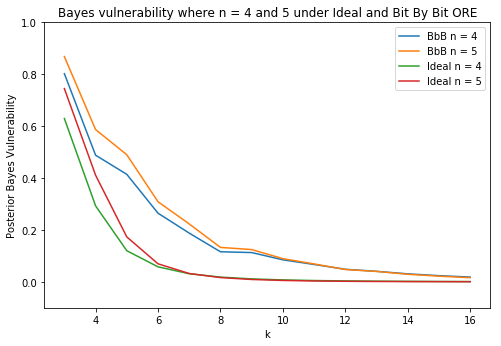

In [33]:
plt.figure(figsize=(8, 5.25))
plt.plot('k', 'BbBn4', data = df, label="BbB n = 4")
plt.plot('k', 'BbBn5', data = df, label="BbB n = 5")
plt.plot('k', 'Idealn4', data = df, label="Ideal n = 4")
plt.plot('k', 'Idealn5', data = df, label="Ideal n = 5")
#plt.plot('k', 'Prior4', data = df, label="Prior n = 4")
#plt.plot('k', 'Prior5', data = df, label="Prior n = 5")
plt.legend(loc='upper right')
plt.xlabel('k')
plt.ylabel('Posterior Bayes Vulnerability')
plt.ylim(bottom=-.1, top = 1)
plt.title('Bayes vulnerability where n = 4 and 5 under Ideal and Bit By Bit ORE')
plt.show()
plt.close()

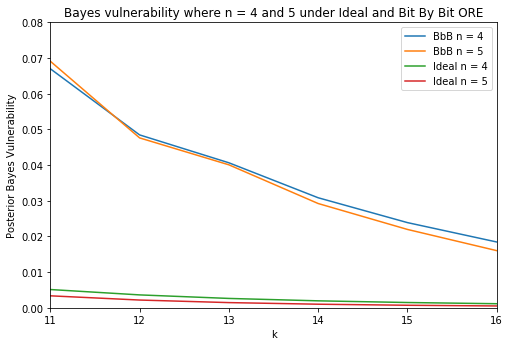

In [27]:
plt.figure(figsize=(8, 5.25))
plt.plot('k', 'BbBn4', data = df, label="BbB n = 4")
plt.plot('k', 'BbBn5', data = df, label="BbB n = 5")
plt.plot('k', 'Idealn4', data = df, label="Ideal n = 4")
plt.plot('k', 'Idealn5', data = df, label="Ideal n = 5")
plt.legend(loc='upper right')
plt.xlabel('k')
plt.ylabel('Posterior Bayes Vulnerability')
plt.ylim(bottom=-.00000001, top = 0.08)
plt.xlim(left = 11, right = 16)
plt.title('Bayes vulnerability where n = 4 and 5 under Ideal and Bit By Bit ORE')
plt.show()
plt.close()

In [3]:
k_list = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
topn5 = [211, 601, 1531, 2401, 3751, 4351, 7351, 8941, 11131, 11851, 14881, 15721, 16681, 16802]
BbBn5 = []
n = 5
for k, t in zip(k_list, topn5):
    BbBn5.append(t / math.pow(k,n))
print(BbBn5)

[0.8683127572016461, 0.5869140625, 0.48992, 0.30877057613168724, 0.22318081751651098, 0.132781982421875, 0.12448983047977104, 0.08941, 0.06911475246971456, 0.04762651105967078, 0.040078859552967604, 0.029230752067590886, 0.021966748971193415, 0.016023635864257812]


In [30]:
k_list = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
prior5 = []
n = 5
for k in k_list:
    prior5.append(1 / math.pow(k, n))
print(prior5)

[0.00411522633744856, 0.0009765625, 0.00032, 0.0001286008230452675, 5.9499018266198606e-05, 3.0517578125e-05, 1.6935087808430286e-05, 1e-05, 6.209213230591551e-06, 4.018775720164609e-06, 2.693290743429044e-06, 1.8593443208187064e-06, 1.3168724279835392e-06, 9.5367431640625e-07]


In [2]:
d = {'k': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    'n4': [65, 125, 259, 343, 451, 475, 741, 849, 981, 1005, 1161, 1185, 1209, 1209], #k = 15 is confusing
    'n5': [211, 601, 1531, 2401, 3751, 4351, 7351, 8941, 11131, 11851, 14881, 15721, 16681, 16802]}
df = pd.DataFrame(data = d)

In [3]:
df

,k,n4,n5
0,3,65,211
1,4,125,601
2,5,259,1531
3,6,343,2401
4,7,451,3751
5,8,475,4351
6,9,741,7351
7,10,849,8941
8,11,981,11131
9,12,1005,11851


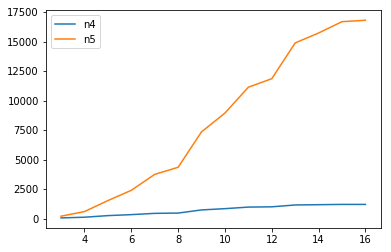

In [4]:
plt.plot('k', 'n4', data = df, label='n = 4')
plt.plot('k', 'n5', data = df, label='n = 5')
plt.legend(loc='upper left')
plt.show()
plt.close()

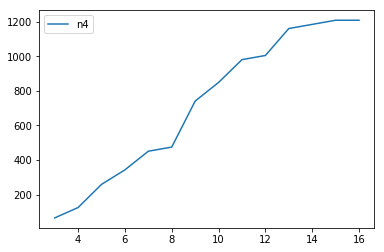

In [5]:
plt.plot('k', 'n4', data = df, label='n4')
plt.legend(loc='upper left')
plt.show()
plt.close()

In [35]:
df['n5/n4'] = df['n5']/df['n4']
df

,k,n4,n5,n5/n4
0,7,451,3751,8.3170731707
1,8,475,4351,9.1600000000
2,9,741,7351,9.9203778677
3,10,849,8941,10.5312131920
4,11,981,11131,11.3465851172
5,12,1005,11851,11.7920398010
6,13,1161,14881,12.8173987941
